# Predicting house prices in King County, USA

João Júlio, Contacts: joaodjulio@gmail.com, https://www.linkedin.com/in/joaodjulio/

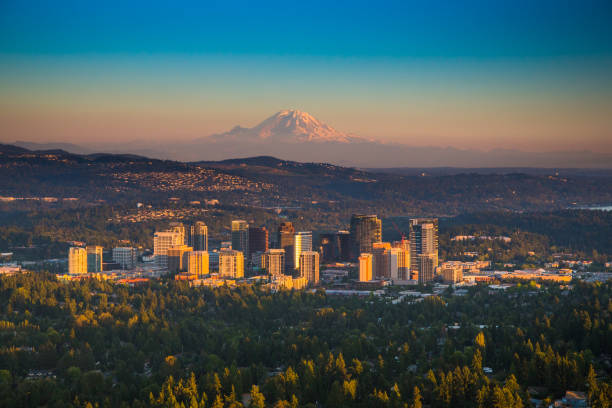

This dataset contains data about the houses sold in King County, including Seattle, between 2014 and 2015 and you can find with at https://www.kaggle.com/harlfoxem/housesalesprediction.

The project is divided in 5 parts:

* [Questions and goals of the project](#Questions-and-goals-of-the-project) <p>
    
* [Features/Variables Description](#Features/Variables-Description) <p>

* [Data Cleaning](#Data-Cleaning) <p>

* [Exploratory Data Analysis](#Exploratory-Data-Analysis) <p>
    
* [Model building](#Model-Building) <p>






# Questions and goals of the project

The main goal of this project is to predict house prices in King County. We are going to do this by fitting a linear regression model!
The other goal is to do a quick EDA and see what we find interesting. When begin this part of the project, I have some questions that I want to be answered:
* **How many houses overlook the waterfront?**
* **How is the data distributed?**
* **What has been the average price of houses sold per month on this dataset?**
* **What has been the number of houses have been sold per month on this dataset?**
<p>
 
Let's go to work!!!

# Features/Variables Description



**These are the variables in our dataset:**

   * id - Unique ID for each home sold


   * date - Date of the home sale


   * price - Price of each home sold


   * bedrooms - Number of bedrooms


   * bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower


   * sqft_living - Square footage of the apartments interior living space


   * sqft_lot - Square footage of the land space


   * floors - Number of floors


   * waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not


   * view - An index from 0 to 4 of how good the view of the property was


   * condition - An index from 1 to 5 on the condition of the apartment,


   * grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.


   * sqft_above - The square footage of the interior housing space that is above ground level


   * sqft_basement - The square footage of the interior housing space that is below ground level


   * yr_built - The year the house was initially built


   * yr_renovated - The year of the house’s last renovation


   * zipcode - What zipcode area the house is in


   * lat - Lattitude


   * long - Longitude


   * sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors


   * sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

First, we have to have a little bit of a taste of our data and then start to clean that data

In [115]:
library(corrplot)
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)
library(stringr)
library(ggforce)
library(RColorBrewer)

In [116]:
df  <- read.csv("kc_house_data.csv", header=TRUE)

In [117]:
head(df)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [118]:
summary(df)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [119]:
str(df)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

After seeing some data, the descritive summary and the structure of the data we need to:
   * Eliminate the **id** and **zipcode** variables because they are not going to be used
   * Correct the **date format** to taking some conclusions about the time with other variables
   * Correct from integer to categorical the variables **waterfront, view, condition and grade** 
   

### Duplicated id's

In [120]:
df[duplicated(df$id), ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
95,6021501535,20141223T000000,700000,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
315,4139480200,20141209T000000,1400000,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
326,7520000520,20150311T000000,240500,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
347,3969300030,20141229T000000,239900,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
373,2231500030,20150324T000000,530000,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
719,8820903380,20150102T000000,730000,6,2.25,2660,13579,2.0,0,0,...,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
825,726049190,20150218T000000,431000,3,1.00,1810,7200,1.0,0,0,...,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
838,8682262400,20150513T000000,419950,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
1087,9834200885,20150420T000000,550000,4,2.50,2080,4080,1.0,0,0,...,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080
1130,8062900070,20150213T000000,369000,5,1.50,2550,6300,1.0,0,0,...,7,1560,990,1959,0,98056,47.5014,-122.172,1380,6300


In [121]:
df[which(df$id==7853420110),]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21581,7853420110,20141003T000000,594866,3,3,2780,6000,2,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000
21582,7853420110,20150504T000000,625000,3,3,2780,6000,2,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


We found out that some homes were sold more that once in this dataset and for different prices! 
<br>
<br>
<br>

### Dropping Columns

In [122]:
zipcode_data  <- table(df$zipcode)
zipcode_data


98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019 98022 
  362   199   280   317   168   498   141   283   100   195   124   190   234 
98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038 98039 98040 
  499    81   412   283   321   256   274   125   432   545   590    50   282 
98042 98045 98052 98053 98055 98056 98058 98059 98065 98070 98072 98074 98075 
  548   221   574   405   268   406   455   468   310   118   273   441   359 
98077 98092 98102 98103 98105 98106 98107 98108 98109 98112 98115 98116 98117 
  198   351   105   602   229   335   266   186   109   269   583   330   553 
98118 98119 98122 98125 98126 98133 98136 98144 98146 98148 98155 98166 98168 
  508   184   290   410   354   494   263   343   288    57   446   254   269 
98177 98178 98188 98198 98199 
  255   262   136   280   317 

In [123]:
# Drop column id
df <- subset (df, select = -id)

In [124]:
# Drop column zipcode
df <- subset (df, select = -zipcode)

### Fixing time/date data 

In [125]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
20141013T000000,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
20150225T000000,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
20141209T000000,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
20150218T000000,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
20140512T000000,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


In [126]:
#Eliminating T000000 from the date column
df$date <- str_replace(df$date, "T000000", "") 

In [127]:
# Spliting the year, month and day
year_split  <- str_sub(df$date, 1, 4)
month_split  <- str_sub(df$date, 5, 6)
day_split  <- str_sub(df$date, 7, 8)

In [128]:
#Concatenate the year, month and day by / and then format from string to date 
date_fix <- paste(year_split, month_split, day_split, sep="/")
converted_data  <- as.Date(date_fix)

In [129]:
df$date  <- converted_data

In [130]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2014-10-13,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2014-12-09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2015-02-25,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2014-12-09,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
2015-02-18,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
2014-05-12,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


### Convert data to categorical format

In [131]:
df$waterfront <- as.factor(df$waterfront)
df$view <- as.factor(df$view)
df$grade <- as.factor(df$grade)
df$condition  <- as.factor(df$condition)

<br>

# Exploratory Data Analysis

Now we are going to investigate the data and try to seek patterns, see how the different variables are related and distributed and check anomalies in the data.

In [132]:
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  75000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2014-07-22   1st Qu.: 321950   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540088   Mean   : 3.371   Mean   :2.115  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :33.000   Max.   :8.000  
                                                                        
  sqft_living       sqft_lot           floors      waterfront view     
 Min.   :  290   Min.   :    520   Min.   :1.000   0:21450    0:19489  
 1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000   1:  163    1:  332  
 Median : 1910   Median :   7618   Median :1.500              2:  963  
 Mean   : 2080   Mean   :  15107   Mean   :1.494              3:  510  
 3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000        

In [133]:
str(df)

'data.frame':	21613 obs. of  19 variables:
 $ date         : Date, format: "2014-10-13" "2014-12-09" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ view         : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition    : Factor w/ 5 levels "1","2","3","4",..: 3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : Factor w/ 12 levels "1","3","4","5",..: 6 6 5 6 7 10 6 6 6 6 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...


In [134]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2014-10-13,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2014-12-09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2015-02-25,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2014-12-09,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
2015-02-18,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
2014-05-12,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


<br>

### Price

After observing the descritive summary, I came to the conclusion that the max price value differs a lot from the median value.

In [135]:
df[order(df$price, decreasing=TRUE),]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
7253,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800
3915,2014-06-11,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449
9255,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730
4412,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345
1449,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750
1316,2015-04-13,5300000,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619
1165,2014-10-20,5110800,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788
8093,2014-06-17,4668000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454
2627,2014-08-15,4500000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408
8639,2014-06-18,4489000,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592


 The top priced houses seem all correct due to the other features of the house!
 <br>
 <br>

 

### Bedrooms

Other problem observed was the fact that the maximum and minimum number of bedrooms numbers differs a lot, and it's wierd to see a house with 33 bedrooms! So we know we plot a table with the number of houses sould with a specific a number of bedrooms:

In [136]:
count_bedrooms <- table(df$bedrooms)
count_bedrooms


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 

In [137]:
df$bedrooms[df$bedrooms == 33] <- 3

Only one house sold had 33 bedrooms and that was probably an error made when storing the data of the house. So I correct it to 3 bedrooms.

In [138]:
df[which(df$bedrooms == 0),]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
876,2014-06-12,1095000,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,47.6362,-122.322,2360,4000
3120,2015-02-05,380000,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,47.7145,-122.356,1470,1399
3468,2014-08-05,288000,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,47.7222,-122.290,1430,1650
4869,2014-10-02,228000,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,47.5260,-122.261,2170,6000
6995,2014-06-24,1295650,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,47.6642,-122.069,4740,35061
8478,2014-11-17,339950,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,47.3473,-122.151,2500,8751
8485,2014-09-25,240000,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,47.3493,-122.053,1810,5685
9774,2015-04-29,355000,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,47.4095,-122.168,2520,8050
9855,2014-12-23,235000,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,47.5265,-121.828,1060,7200
12654,2015-02-18,320000,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,47.5261,-121.826,1500,4675


<br>
<br>

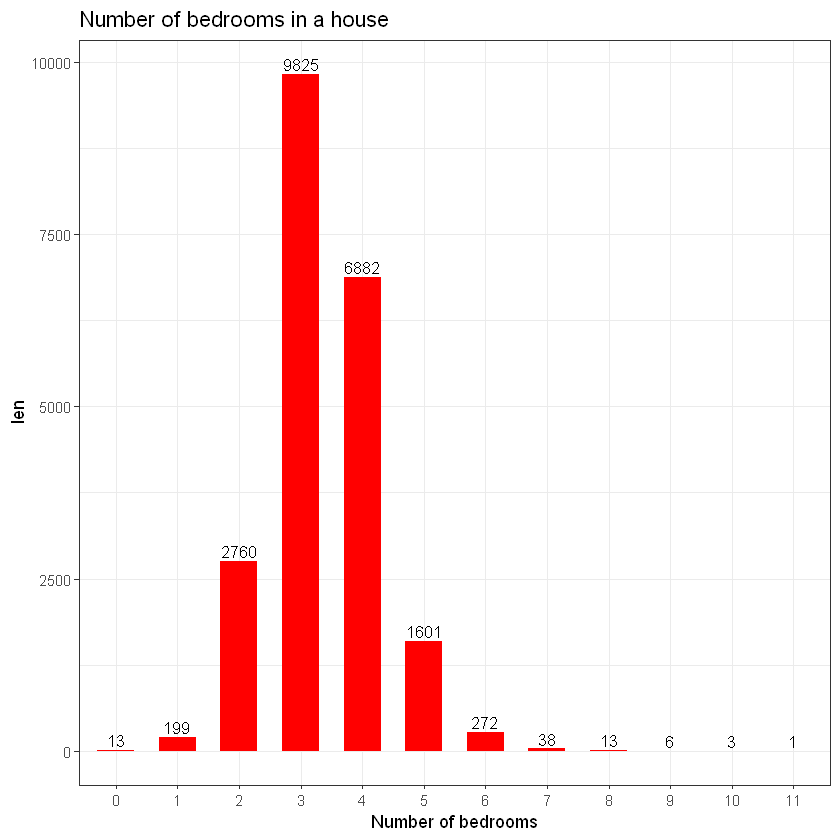

In [139]:
cb <- as.data.frame(table(df$bedrooms))

ggplot(data=cb, aes(x=Var1, y=Freq, fill= Var1)) +
geom_bar(stat="identity",fill="red", width=0.6) +
geom_text(aes(label=Freq), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Number of bedrooms in a house", 
        x ="Number of bedrooms", y = "len", fill= "view")


Most of the houses have between 2 and 5 bedrooms, with 3 and 4 being the most common number of bedrooms.

<br>

### No bathrooms or bedrooms?

In [140]:
nrow(df)
df[which(df$bathrooms == 0 & df$bedrooms == 0),]
df <- df[-which(df$bathrooms == 0 & df$bedrooms == 0),]

[1] 21613

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
876,2014-06-12,1095000,0,0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,47.6362,-122.322,2360,4000
3120,2015-02-05,380000,0,0,1470,979,3.0,0,2,3,8,1470,0,2006,0,47.7145,-122.356,1470,1399
6995,2014-06-24,1295650,0,0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,47.6642,-122.069,4740,35061
9774,2015-04-29,355000,0,0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,47.4095,-122.168,2520,8050
9855,2014-12-23,235000,0,0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,47.5265,-121.828,1060,7200
14424,2015-04-13,139950,0,0,844,4269,1.0,0,0,4,7,844,0,1913,0,47.2781,-122.250,1380,9600
19453,2014-09-26,142000,0,0,290,20875,1.0,0,0,1,1,290,0,1963,0,47.5308,-121.888,1620,22850


We found that some houses doesn't have neither bathroom or bedroom. That's weird, because some of the houses have 3 or 2 floors! I'm not in the real state business but this sounds suspicious, so I'm going to eliminate this rows.

<br>
<br>

### Waterfront

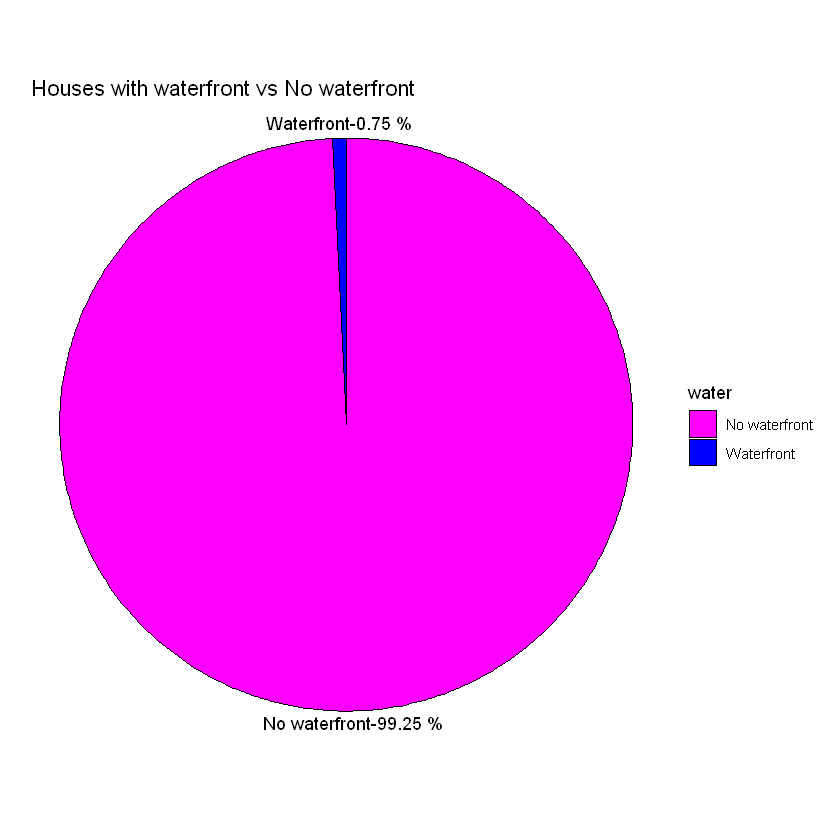

In [141]:
count_waterfront <- table(df$waterfront)
waterf_data <- data.frame(water=c("No waterfront", "Waterfront"),
                len=c(21450 , 163))
waterf_data$Label <- paste(waterf_data$water, paste(round(((waterf_data$len/sum(waterf_data$len))*100),2),"%"), sep='-')
waterf_data <- waterf_data %>% 
  mutate(end = 2 * pi * cumsum(len)/sum(len),
         start = lag(end, default = 0),
         middle = 0.5 * (start + end),
         hjust = ifelse(middle > pi, 0.5, 0.5),
         vjust = ifelse(middle < pi/2 | middle > 3 * pi/2, -0.6, 1.3))

ggplot(waterf_data) + 
  geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = 1,
                   start = start, end = end, fill = water)) +
  ggtitle("Houses with waterfront vs No waterfront")+
  geom_text(aes(x = 1 * sin(middle), y = 1 * cos(middle), label = Label,
            hjust = hjust, vjust = vjust)) +
  coord_fixed() +
  theme_minimal()+
  scale_fill_manual(values=c("#FF00FF", "#0000FF"))+
  scale_x_continuous(limits = c(-1, 1),  # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL) +
  scale_y_continuous(limits = c(-1, 1),      # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL)

It's easy to see that most of the houses have no waterfront.

### View

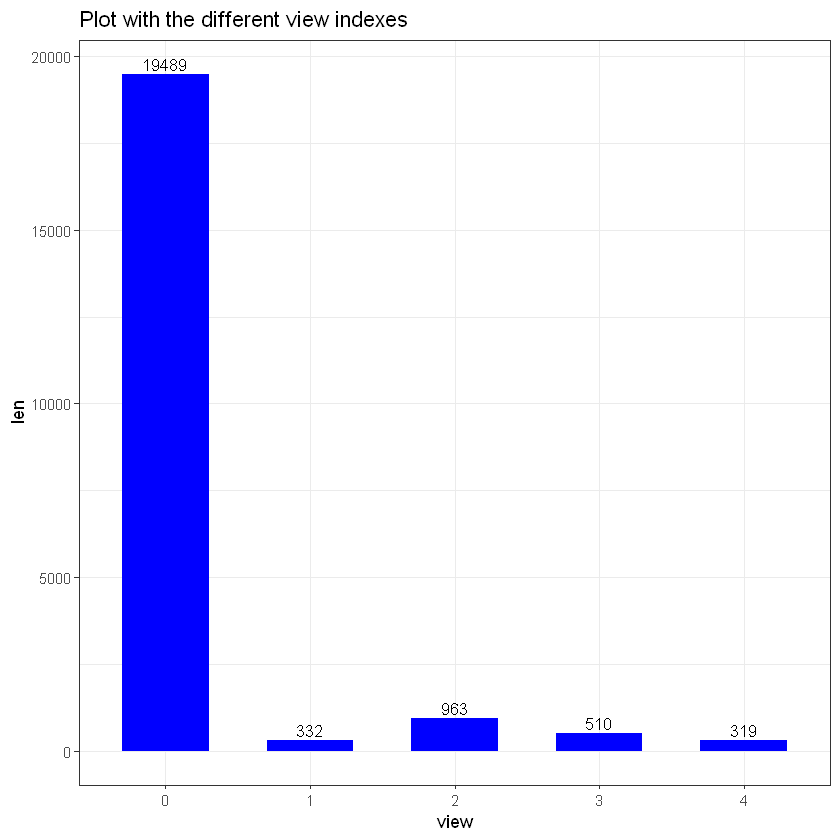

In [142]:
count_view <- table(df$view)
view_data <- data.frame(condition=c(0,1,2,3,4), 
                          len=c(19489,332,963,510,319))

ggplot(data=view_data, aes(x=as.factor(condition), y=len, fill= as.factor(condition))) +
geom_bar(stat="identity",fill="blue", width=0.6) +
geom_text(aes(label=len), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Plot with the different view indexes", 
        x ="view", y = "len", fill= "view")

We see a lot of 0, it's weird that most of

### View

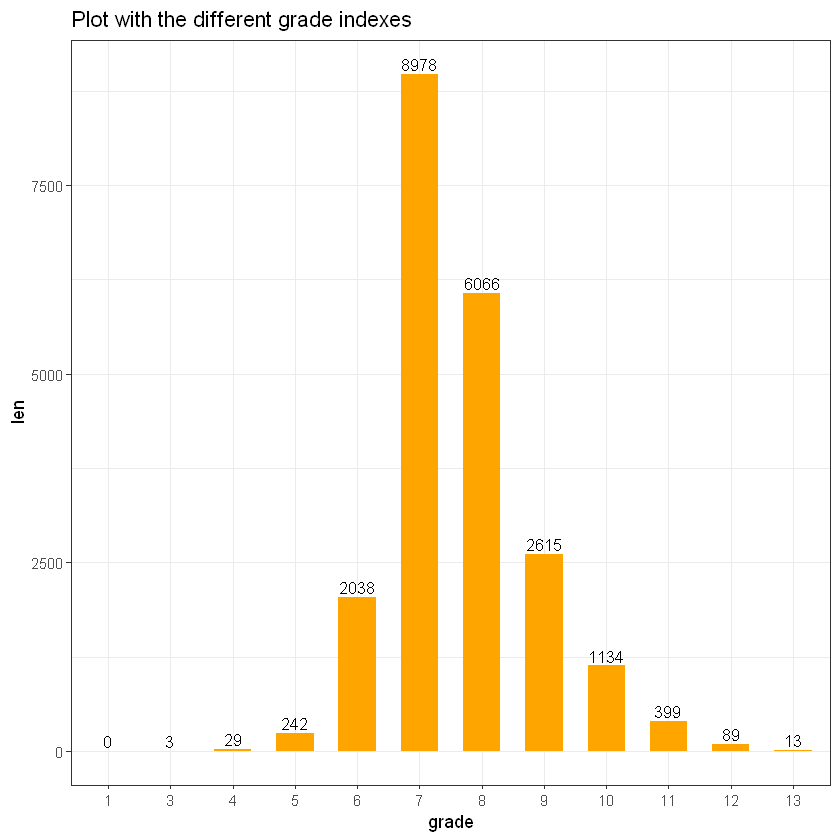

In [143]:
count_grade  <- table(df$grade)
cg <- as.data.frame(count_grade)

ggplot(data=cg, aes(x=Var1, y=Freq, fill= Var1)) +
geom_bar(stat="identity",fill="orange", width=0.6) +
geom_text(aes(label=Freq), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Plot with the different grade indexes", 
        x ="grade", y = "len", fill= "grade")

We can see that most of the observations are between 7 and 8. We have 13 different classes, because of that I don't think that this is going to be useful to the model. So, we are just going to eliminate this variable/feature from our dataframe:

In [144]:
df <- df[,-11]
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  75000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2014-07-22   1st Qu.: 322000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540095   Mean   : 3.371   Mean   :2.115  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :11.000   Max.   :8.000  
  sqft_living       sqft_lot           floors      waterfront view     
 Min.   :  370   Min.   :    520   Min.   :1.000   0:21443    0:19484  
 1st Qu.: 1428   1st Qu.:   5040   1st Qu.:1.000   1:  163    1:  332  
 Median : 1910   Median :   7619   Median :1.500              2:  961  
 Mean   : 2080   Mean   :  15108   Mean   :1.494              3:  510  
 3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000              4:  319  
 Max.   :13540   Max.   :1651359   Max.   :3.500         

### Condition

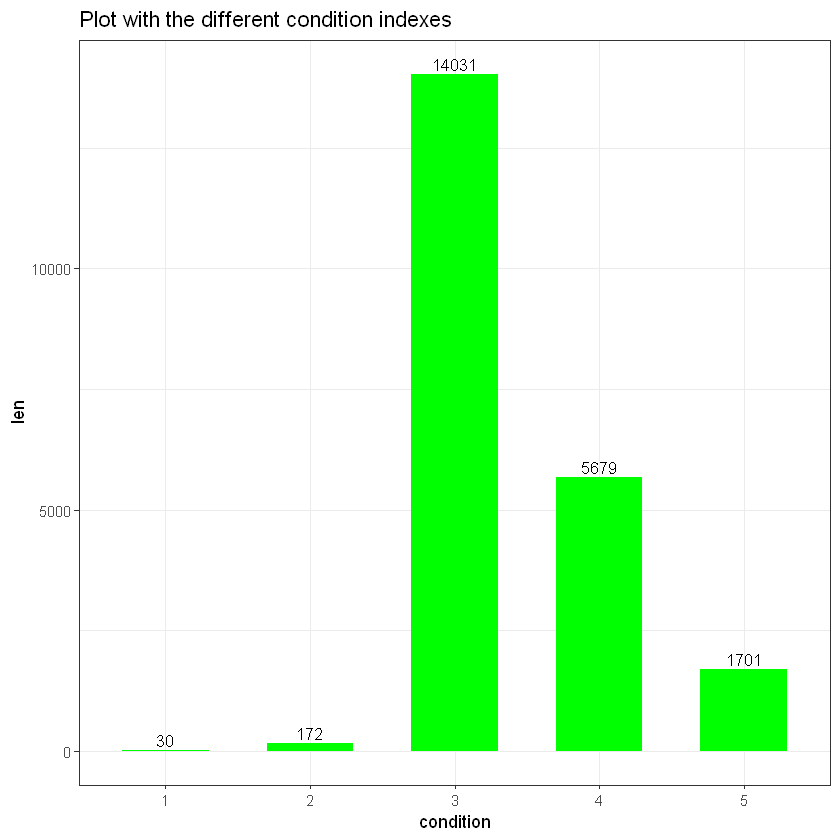

In [145]:
count_condition <- table(df$condition)
condition_data <- data.frame(condition=c(1,2,3,4,5), 
                          len=c(30,172,14031,5679,1701))

ggplot(data=condition_data, aes(x=as.factor(condition), y=len, fill= as.factor(condition))) +
geom_bar(stat="identity",fill="green", width=0.6) +
geom_text(aes(label=len), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Plot with the different condition indexes", 
        x ="condition", y = "len", fill= "condition")

### Year renovated

In [146]:
yr_ren_data <- as.data.frame(table(df$yr_renovated))
colnames(yr_ren_data) <- c("Year Renovated", "Number of houses")
print.data.frame(yr_ren_data)

   Year Renovated Number of houses
1               0            20692
2            1934                1
3            1940                2
4            1944                1
5            1945                3
6            1946                2
7            1948                1
8            1950                2
9            1951                1
10           1953                3
11           1954                1
12           1955                3
13           1956                3
14           1957                3
15           1958                5
16           1959                1
17           1960                4
18           1962                2
19           1963                4
20           1964                5
21           1965                5
22           1967                2
23           1968                8
24           1969                4
25           1970                9
26           1971                2
27           1972                4
28           1973   

Looking at the table, we see that most of the houses have never been renewed!

## Distribution of the data

We are going to plot some histograms with the density curve to see how most of our numerical variables are distributed! It's always good ideia to do this.

ERROR: Error in `[.data.frame`(df, i): undefined columns selected


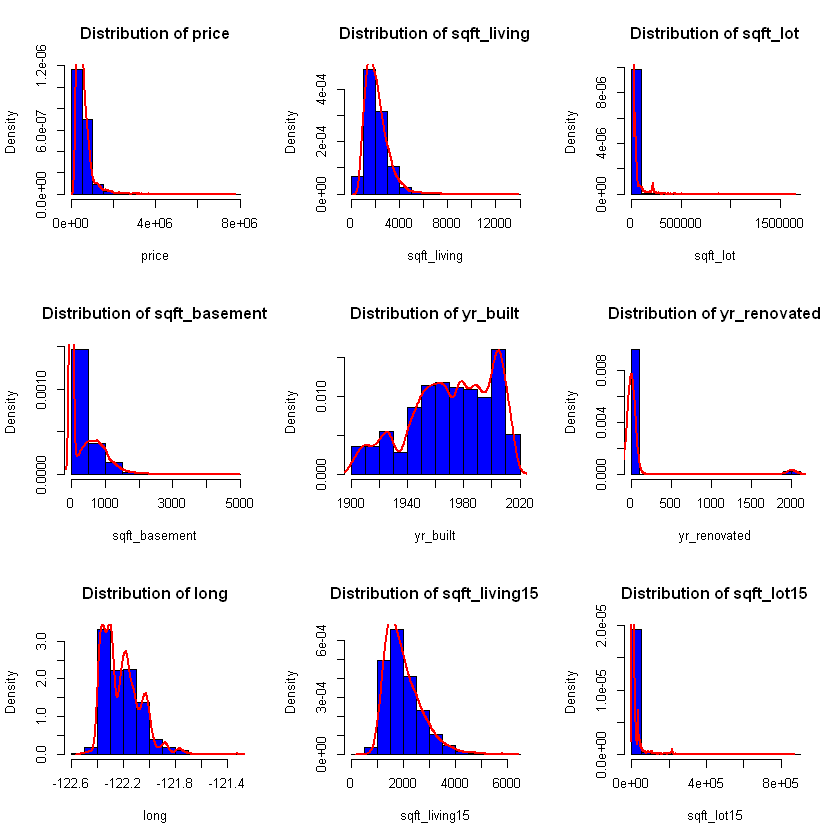

In [147]:
par(mfrow=c(3,3))
hist_data <- c(2,5,6,12,13,14,16,17,18,19)
for (i in hist_data){
labels_hist <- colnames(df[i])
hist(df[,i], # histogram
 col="blue", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = str_interp("${labels_hist}"),
 main = str_interp("Distribution of ${labels_hist}"))
lines(density(df[,i]), # density plot
 lwd = 2, # thickness of line
 col = "red")
}

<br>

### Time series data

Just for curiosity, I wanted to see the average price of the houses and the number of houses sold per month between May 2014 and May 2015:

In [ ]:
# Creating a new dataframe to store the month, year, average price of the
# houses sold and number of houses sold in that month

df_ts <- df %>%
  mutate(Year = year(date), Month = month(date)) %>%
  group_by(Month, Year) %>%
  summarise(tibble(result = n(), avg_price = mean(price)))

df_ts$dmy  <- paste("01", df_ts$Month, df_ts$Year,sep = "-")
df_ts$dmy <- as.Date(df_ts$dmy,  format = "%d-%m-%Y")
df_ts <- df_ts[order(as.Date(df_ts$dmy, format="%d/%m/%Y")),]


In [ ]:
# New dataframe for timeseries data
df_ts
sum(df_ts$result)

In [ ]:
ggplot(data = df_ts, aes(x = dmy, y = result))+
geom_line(color = "brown1", size = 1)+
xlab("Date")+
ylab("Number of houses sold")+
ggtitle("Number of houses sold per Month in King County")+
theme_bw()+
geom_point()

We can see that the number of houses sold between July 2014 and January 2015 was dropping , but after January 2015 it start rising until May where the number of houses sold reached the bottom. At first it look like we had a pattern, where in the "first half" of the year the number of houses sold starts increasing and then until the end of the year drops. But we can't say this because if we look at the last point in our plot, we see that the number of the houses sold hits the bottom in the first half of the year. 
<br>
<br>
<br>

In [ ]:
ggplot(data = df_ts, aes(x = dmy, y = avg_price))+
geom_line(color = "darkorchid1", size = 1)+
xlab("Date")+
ylab("Average price")+
ggtitle("Average price of the houses sold per Month in King County")+
theme_bw()+
geom_point()+
scale_y_continuous(labels=function(n){format(n, scientific = FALSE)})

These plots seems to have the same pattern, in the second half of the year the average price of the houses keeps dropping. This makes sense (at least to me), because less houses sold implies that the average price of the houses sold decreases. But looking at the last data point in our plot, we see that the average price is the second highest! This is quite interesting because the number of houses sold on May 2015 was the lowest, with 646 houses sold.

<br>

### Correlation matrix, correlation plot and multiple scatter plots

Now we are going to construct a correlation matrix that is going to be use to plot a correlation plot. This is going to help us, check what variables/features have a linear relation with each other! <p>
Finally, we plot multiple scatter plots between our variables/features to check if we are in the presence of any non-linear relations.

In [ ]:
summary(df)

In [ ]:
cor_data  <- df[, c(2,3,4,5,6,7,11,12,13,14,15,16,17,18)]
cormat <- round(cor(cor_data),2)
cormat

In [ ]:

corrplot(cormat, method = "color", col = brewer.pal(n=8, name="BrBG"),
         number.cex = .7,
         addCoef.col = "black", 
         tl.col = "black", tl.srt = 90)

Looking to the correlation plot, we see that our **dependent/target variable price** has a moderate positive correlation between **bathrooms, sqft_living, sqft_above and sqft_living15**. **sqft_living15** 

Now we are going to look to the independent variables:

* **bathrooms**: highly correlated - **sqft_living** and **sqft_above**. 
* **sqft_living**: highly correlated - **sqft_above**, **bathrooms**, **sqft_livng15**.
* **sqft_above**: highly correlated - **sqft_living** and **sqft_livng15**.
* **sqft_lot**: highly correlated - **sqft_lot15**
* **sqft_living15**: highly correlated - **sqft_living** and **sqft_above**
* **sqft_lot**: highly correlated - **sqft_lot15**



We see that we gonna **have a problem, called multicolinearity**. This happens when **we have some features/variables that are related to each other** and because of that, **the model will find it hard to detect what was the feature/variable that had impact on the model**. In other words, **features/variables are fighting for significance in the model**.
For example, we saw that the features **sqft_living and sqft_above had an high correlation**. In the real world it makes sense,
more square footage of the interior housing space is related to more square footage of the interior housing space that is above ground level... In other words **bigger the living space, bigger living space above ground level**.

In [ ]:
pairs(cor_data)

We see some non-linear relations between the target variable and the independent variables:
* **sqft_lot**
* **lat**
* **long**
* **sqft_lot15**
* **floors**

# Model Building

In [ ]:
library(lmtest)
library(olsrr)
library(tseries)  
library(MASS)

So this is the last part of our project, what we are going to do first is split our data in to a training and test set. Then we will try to fit a linear regression model that can predict with accuracy the price of a house.

In [ ]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]